In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv("Speed Dating Data.csv", encoding="ISO-8859-1")

In [4]:
df.head(20)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.00,20.00,20.00,20.00,0.00,5.00,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.00,0.00,0.00,40.00,0.00,0.00,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.00,18.00,19.00,18.00,14.00,12.00,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.00,5.00,15.00,40.00,5.00,

## Lecture du dataset

On remarque que la Wave 6 à 9 ont pas la même méthode d'évaluation des préference, je vais donc préferer les enlevé du dataset.

Préference Scale de 6 à 9 est de 1-10 scale et le reste est 100pt alloc.

En regardent de plus près il y a des doublon dans iid qui represente une seule personne nous allons supprimer tous c'est doublons.

iid est un sujezt unique il est pas nesseçaire de les avoir en double.


In [5]:
df = df[(df["wave"] != 6) & (df["wave"] != 7) & (df["wave"] != 8) & (df["wave"] != 9)]
df.drop_duplicates(subset = ["iid"], inplace=True)

Maintenant nous allons faire le tri parmis c'est 195 columns, il y en a surment qui ne sont pas pértinente pour faire les analyses que nous avons besoin.




In [6]:
df = df[["iid", "gender", "pid", "match", "int_corr", "samerace", "age_o", "dec_o", "from", "date", "goal", "age", "go_out", "field", "career", "race", "career_c", "sports", "tvsports", "exercise", "dining", "museums", "art", "hiking",\
                "gaming", "clubbing", "reading", "tv", "theater", "movies", "concerts", "music", "shopping", "yoga", "exphappy", "attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1", "attr2_1", "date_3" ]]

In [7]:
df

,iid,gender,pid,match,int_corr,samerace,age_o,dec_o,from,date,goal,age,go_out,field,career,race,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1
0,1,0,11.0,0,0.14,0,27.0,0,Chicago,7.0,2.0,21.0,1.0,Law,lawyer,4.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0
10,2,0,11.0,0,0.29,1,27.0,0,Alabama,5.0,1.0,24.0,1.0,law,law,2.0,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,45.0,5.0,25.0,20.0,0.0,5.0,65.0
20,3,0,11.0,0,-0.24,1,27.0,0,Connecticut,3.0,6.0,25.0,1.0,Economics,Economist,2.0,NaN,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,35.0,10.0,35.0,10.0,10.0,0.0,50.0
30,4,0,11.0,0,-0.18,1,27.0,0,Texas,5.0,1.0,23.0,1.0,Law,lawyer/policy work,2.0,1.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,20.0,20.0,20.0,20.0,10.0,10.0,30.0
40,5,0,11.0,0,-0.43,1,27.0,0,Bowdoin College,4.0,2.0,21.0,1.0,Law,lawyer,2.0,1.0,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,7.0,20.0,5.0,25.0,25.0,10.0,15.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8268,548,1,509.0,1,0.23,0,28.0,1,Germany,6.0,1.0,30.0,1.0,Business,Management,2.0,7.0,10.0,8.0,4.0,10.0,3.0,2.0,2.0,5.0,1.0,9.0,6.0,4.0,6.0,7.0,10.0,4.0,1.0,7.0,40.0,10.0,20.0,10.0,0.0,20.0,30.0
8290,549,1,509.0,0,0.43,0,28.0,0,Italy,7.0,1.0,28.0,1.0,General management/finance,General management/consulting,2.0,7.0,8.0,5.0,6.0,9.0,7.0,7.0,4.0,8.0,8.0,7.0,7.0,8.0,8.0,10.0,10.0,8.0,2.0,5.0,20.0,20.0,20.0,20.0,0.0,20.0,35.0
8312,550,1,509.0,0,0.65,0,28.0,1,UK,4.0,2.0,30.0,1.0,MBA,Finance,2.0,7.0,5.0,3.0,5.0,9.0,7.0,8.0,3.0,3.0,8.0,8.0,3.0,7.0,7.0,4.0,6.0,6.0,3.0,7.0,30.0,3.0,30.0,30.0,3.0,4.0,20.0
8334,551,1,509.0,0,0.62,0,28.0,0,London & New York,6.0,1.0,27.0,3.0,Business,Banking,1.0,7.0,6.0,1.0,7.0,6.0,7.0,3.0,2.0,1.0,7.0,10.0,2.0,5.0,6.0,7.0,7.0,7.0,1.0,3.0,40.0,20.0,20.0,20.0,0.0,0.0,60.0


In [8]:
display(100*df.isnull().sum()/df.shape[0])

iid         0.000000
gender      0.000000
pid         0.000000
match       0.000000
int_corr    1.336303
samerace    0.000000
age_o       0.000000
dec_o       0.000000
from        1.336303
date        1.559020
goal        1.336303
age         1.559020
go_out      1.336303
field       1.113586
career      1.559020
race        1.113586
career_c    2.449889
sports      1.336303
tvsports    1.336303
exercise    1.336303
dining      1.336303
museums     1.336303
art         1.336303
hiking      1.336303
gaming      1.336303
clubbing    1.336303
reading     1.336303
tv          1.336303
theater     1.336303
movies      1.336303
concerts    1.336303
music       1.336303
shopping    1.336303
yoga        1.336303
exphappy    1.559020
attr1_1     1.336303
sinc1_1     1.336303
intel1_1    1.336303
fun1_1      1.559020
amb1_1      1.781737
shar1_1     2.004454
attr2_1     1.336303
dtype: float64

Nous voila avec un dataset plus lisible et sans trop de valeur manquante

regardons la proportion de femme et d'homme dans le dataset.

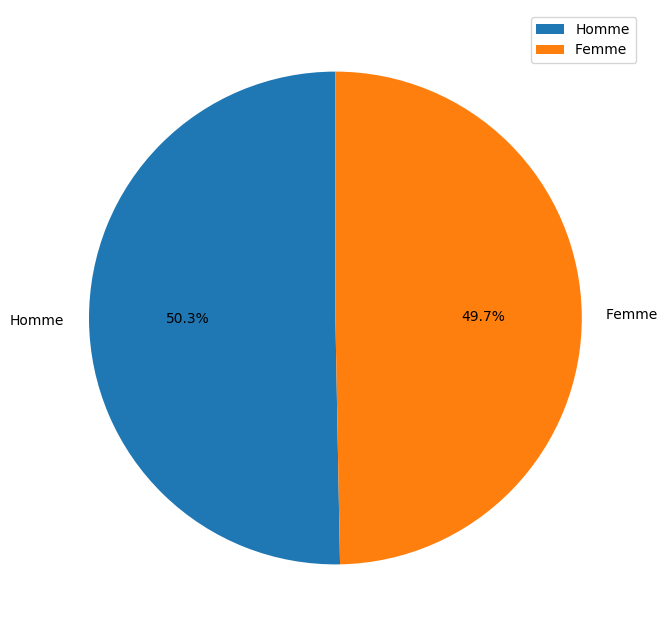

In [17]:
genre = df["gender"].value_counts(normalize=True).round(3)
labels =  ['Homme', 'Femme ']
# myexplode = [0.1, 0.1, 0.2, 0]
plt.figure(figsize=(10,8))
plt.pie(genre, labels=labels, autopct='%1.1f%%', startangle=90)
plt.legend()
plt.show()

On est sur une proportion a quasiment 50% de chaque.

regardons la proportion de match entre les hommes et femmes.

In [21]:
df_homme = df[(df["gender"] == 1)]
df_femme = df[(df["gender"] == 0)]



In [24]:
df_homme["match"].value_counts(normalize=True).round(3)


0    0.823
1    0.177
Name: match, dtype: float64

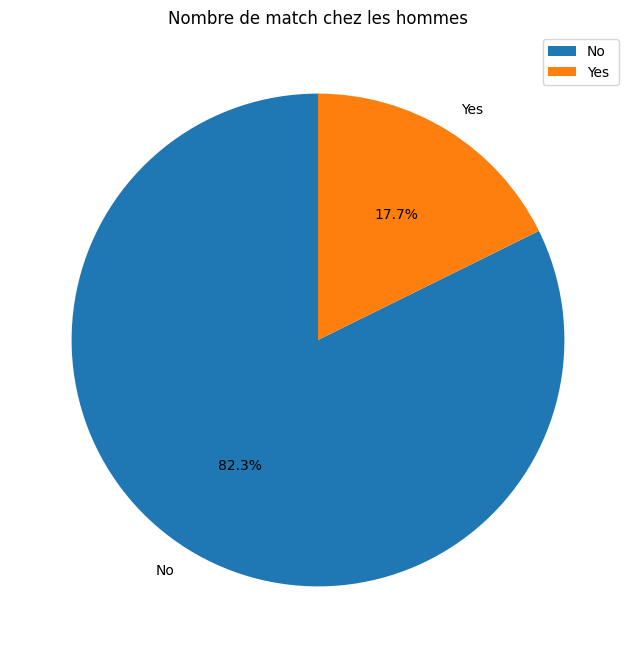

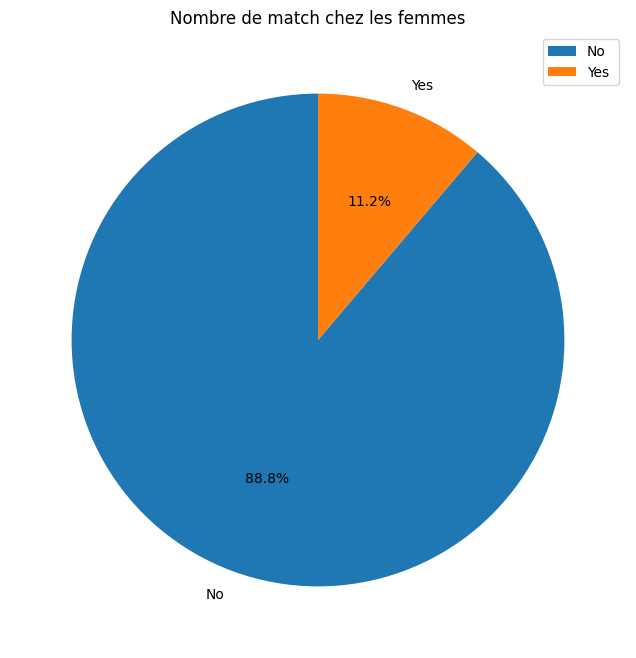

In [29]:
count = df_homme["match"].value_counts(normalize=True).round(3)
labels =  ['No', 'Yes ']
plt.figure(figsize=(10,8))
plt.pie(count, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Nombre de match chez les hommes")
plt.legend()
plt.show()
count = df_femme["match"].value_counts(normalize=True).round(3)
labels =  ['No', 'Yes ']
plt.figure(figsize=(10,8))
plt.pie(count, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Nombre de match chez les femmes")
plt.legend()
plt.show()

Nous avons 6% d'hommes en plus que chez les femmes qui ont un match.

regardons un histogram de l'age.

In [49]:
newnames = {"1":"Male", "0":"Female"}
plt.figure(figsize=(10,8))
fig = px.histogram(df, x="age", labels=labels, color="gender", title="Distribution de l'âge par genre")
fig.update_layout(title_x=0.5, legend_title="")
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.show()

<Figure size 1000x800 with 0 Axes>

regardon l'age moyen ça nous donnera une meilleur indiquation.

In [53]:
homme_mean = df_homme["age"].mean().round(2)
femme_mean = df_femme["age"].mean().round(2)

In [59]:
data = [["homme", homme_mean], ["femme", femme_mean]]
df_age_mean = pd.DataFrame(data, columns=["gender", "age mean"])
df_age_mean

,gender,age mean
0,homme,26.48
1,femme,26.07


Les hommes sont l'égèrement plus âgé.